# Time Series Analysis of TESS

This time series analysis of TESS data was an endeavor to substantiate the presence of relevant planet signals for the high, proper-motion G-type star HD 20794.

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import pandas as pd
from astropy.timeseries import LombScargle

### Fonts and Sizes

Here we keep variables to have consistent fonts and plot sizes throughout this analysis. 

In [2]:
title_font = 18
label_font = 14
text_font = 12
figsize = (9, 5)

### Stellar signals

These are variables holding the periods for a number of planets, with some being possible signals for planets. Specifically, planets c, f, and g are possible planet signals. These are found in the paper linked above. Planet d has the variable <tt>pld</tt> due to conflicts with the import of pandas. The planet c signal is reported to be the possible rotation period of HD~20794, so we will use that as our rp variable.

In [3]:
pb = 18.33
pc = 43.17
pld = 88.90
pe = 147.02
pf = 331.41
pg = 11.86
rp = pc

### Base Functions & Variables

Below is a single function and variables that are used throughout the notebook. The first code cell contains variables used in the following functions and contains the relevant planet signals from the previous code cell.

The <tt>freq_vlines</tt> function is for creating vertical lines at the proper positions for the each stellar signal. 

In [82]:
planets = [1/pb, 1/pc, 1/pld, 1/pe, 1/pf, 1/pg]
planet_labels = ['b (1/18.33)', 'c (1/43.17)', 'd (1/88.90)', 'e (1/147.02)', 'f (1/331.41)', 'g (1/11.86)']
color_array = ['red', 'black', 'green', 'orange', 'purple', 'magenta']

In [79]:
def freq_vlines():
    for p, p_l, c_a in zip(planets, planet_labels, color_array):
        plt.axvline(p, linestyle='--', color=c_a, alpha=0.7, label=p_l)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

### MAST Files
Change the file paths to match those on your machine. This is the information pertaining to each individual MAST file, including start and end times, cadence duration, and sector number. The file name is next to each MAST entry.

 - MAST1: tess2018263035959-s0003-0000000301051051-0123-s
   - sequence_number = 3
   - t_exptime = 120 s
   - t_min = 58381.5357557292 (2018-09-20 12:51:29)
   - t_max = 58408.8861263079 (2018-10-17 21:16:01)
 - MAST2: tess2018292075959-s0004-0000000301051051-0124-s
   - sequence_number = 4
   - t_exptime = 120 s
   - t_min = 58410.4027964352 (2018-10-19 09:40:01)
   - t_max = 58436.3386066435 (2018-11-14 08:07:35)
 - MAST3: tess2020266004630-s0030-0000000301051051-0195-a_fast
   - sequence_number = 30
   - t_exptime = 20 s
   - t_min = 59115.38689563 (2020-09-23 09:17:07)
   - t_max = 59142.72491223 (2020-10-20 17:23:52)
 - MAST4: tess2020266004630-s0030-0000000301051051-0195-s
   - sequence_number = 30
   - t_exptime = 120 s
   - t_min = 59115.38689563 (2020-09-23 09:17:07)
   - t_max = 59142.71634742 (2020-10-20 17:11:32)
 - MAST5: tess2020294194027-s0031-0000000301051051-0198-a_fast
   - sequence_number = 31
   - t_exptime = 20 s
   - t_min = 59144.01635112 (2020-10-22 00:23:32)
   - t_max = 59169.44747119 (2020-11-16 10:44:21)
 - MAST6: tess2020294194027-s0031-0000000301051051-0198-s
   - sequence_number = 31
   - t_exptime = 120 s
   - t_min = 59144.01635112 (2020-10-22 00:23:32)
   - t_max = 59169.44654529 (2020-11-16 10:43:01)

Where sequence_number is the sector number, t_exptime is the exposure time, t_min is the start time, and t_max is the end time. Within the context of the exposure time, a long cadence is 120 seconds and a short cadence is 20 seconds. This information was retreived from the <a href="https://mast.stsci.edu/portal/Mashup/Clients/Mast/Portal.html">Barbara A. Mikulski Archive for Space Telescopes</a>.

In [7]:
MAST1 = "/Users/andrewandmatthewfonseca/NWelch/HD20794/TESS_MAST_Files/MAST_2025-03-05T0804/TESS/tess2018263035959-s0003-0000000301051051-0123-s/tess2018263035959-s0003-0000000301051051-0123-s_lc.fits"
MAST2 = "/Users/andrewandmatthewfonseca/NWelch/HD20794/TESS_MAST_Files/MAST_2025-03-05T0804-2/TESS/tess2018292075959-s0004-0000000301051051-0124-s/tess2018292075959-s0004-0000000301051051-0124-s_lc.fits"
MAST3 = "/Users/andrewandmatthewfonseca/NWelch/HD20794/TESS_MAST_Files/MAST_2025-03-05T0804-3/TESS/tess2020266004630-s0030-0000000301051051-0195-a_fast/tess2020266004630-s0030-0000000301051051-0195-a_fast-lc.fits"
MAST4 = "/Users/andrewandmatthewfonseca/NWelch/HD20794/TESS_MAST_Files/MAST_2025-03-05T0804-4/TESS/tess2020266004630-s0030-0000000301051051-0195-s/tess2020266004630-s0030-0000000301051051-0195-s_lc.fits"
MAST5 = "/Users/andrewandmatthewfonseca/NWelch/HD20794/TESS_MAST_Files/MAST_2025-03-05T0804-5/TESS/tess2020294194027-s0031-0000000301051051-0198-a_fast/tess2020294194027-s0031-0000000301051051-0198-a_fast-lc.fits"
MAST6 = "/Users/andrewandmatthewfonseca/NWelch/HD20794/TESS_MAST_Files/MAST_2025-03-05T0804-6/TESS/tess2020294194027-s0031-0000000301051051-0198-s/tess2020294194027-s0031-0000000301051051-0198-s_lc.fits"
mast_files = [MAST1, MAST2, MAST3, MAST4, MAST5, MAST6]

## Functions

These are functions that are used in the process of creating periodograms plots for each TESS sector, as well as a and average periodogram, encompassing all TESS sectors.

### Proccessing MAST Files

This function is to process MAST files by grabbing relevant data fields, such as time, flux, and resolution. We also remove any NaN values and sigma clip by 3$\sigma$ to remove outliers caused by flares, which can bias our periodogram at high frequencies.

In [8]:
def process_MAST_file(mast_file_path):
    fits_data = fits.open(mast_file_path)
    data = fits_data[1].data
    time = data.field('TIME')
    pdcsap_flux = data.field('PDCSAP_FLUX')
    time_baseline = time[-1] - time[0]
    resolution = 1 / time_baseline
    
    indices = np.where(~np.isnan(pdcsap_flux))[0]
    time = time[indices]
    pdcsap_flux = pdcsap_flux[indices]
    
    std_dev = np.std(pdcsap_flux)
    good_data = np.where(np.abs(pdcsap_flux - np.mean(pdcsap_flux)) < 3 * std_dev)[0]
    time = time[good_data]
    pdcsap_flux = pdcsap_flux[good_data]
    
    return time, pdcsap_flux

### Plotting MAST Files

Here we create scatter plots from the MAST files. With these scatter plots, we can see the potential presence of a signal.

In [9]:
def plot_MAST_file(mast_file_path, sector_num, cadence):
    time, pdcsap_flux = process_MAST_file(mast_file_path)
    plt.figure(figsize=figsize)
    plt.scatter(time, pdcsap_flux, alpha=0.1, color='royalblue', marker='.')
    plt.title(f'TESS Sector {sector_num} ({cadence})', fontsize=title_font)
    plt.xlabel('Time (Days)', fontsize=label_font)
    plt.ylabel(r"PDCSAP-Flux (e- s$^{-1}$)", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.show()

### Harmonics

We create harmonics of any signal that is passed into the function to apply to the Lomb-Scargle periodogram. This function is then repurposed into a harmonics array. We then apply this array to the avearged TESS periodogram later on. We also shade a resolution margin on both sides of the harmonics.

In [67]:
def harmonics(num, mast_file_path):
    time, pdcsap_flux = process_MAST_file(mast_file_path)
    time_baseline = time[-1] - time[0]
    resolution = 1 / time_baseline

### Harmonics Array

This is the array that we repurposed the previous function for. This will be applyed solely to the average TESS periodogram plot. This function is needed to capture multiple frequencies and serve as a complete representation of the signal's behavior for use in the averaged periodogram. Rather then passing the harmonics function into harmonics_array, this function is limited to a range that captures only the first five resolution lines. These are the peaks within the average periodogram that are used in the time series analysis.

In [68]:
def harmonics_array(num, mast_file_paths):
    for mast_file_path in mast_file_paths:
        time, pdcsap_flux = process_MAST_file(mast_file_path)
        time_baseline = time[-1] - time[0]
        resolution = 1 / time_baseline

### Calculate and Plot Lomb-Scargle

This function is used to calculate and plot Lomb-Scargle periodograms as semi-log on y-axis. These Lomb-Scargle periodograms are used for characterizing periodic signals in unevenly spaced or irregularly timed data. These will be done for all the sectors present. We also used the harmonics function here to view harmonics of the input signal. The nyquist factor is the multiple of the average nyquist frequency used to choose the maximum frequency. The nyquist factor is set to one because we have a function to find our maximum frequency, as well as other information.

In [12]:
def plot_lomb_scargle(mast_file_path):
    time, pdcsap_flux = process_MAST_file(mast_file_path)
    frequency, power = LombScargle(time, pdcsap_flux, normalization="psd").autopower(nyquist_factor=1)
    plt.figure(figsize=figsize)
    plt.semilogy(frequency, power, linewidth=2, color='royalblue')
    plt.title('Lomg-Scargle Periodogram', fontsize=title_font)
    plt.xlabel('Frequency (cycle per day)', fontsize=label_font)
    plt.ylabel(r"Power (e-$^{2}$ s$^{-2}$ day)", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.xlim(0, 1)
    plt.ylim(1e2, 1e9)
    harmonics(rp, mast_file_path)
    plt.show()

### Calculating Frequency

Unlike the harmonics function, we use this function to get the maximum frequnecy, fundamental harmonics, and the maximum period of each MAST file. These are printed out in the 'Plots' section for each MAST file.

In [89]:
def calculate_frequency(mast_file_path):
    time, pdcsap_flux = process_MAST_file(mast_file_path)
    frequency, power = LombScargle(time, pdcsap_flux, normalization="psd").autopower(nyquist_factor=1)
    max_index = np.argmax(power)
    max_power_frequency = frequency[max_index]
    max_period = 1 / max_power_frequency
    harmonic_plus_one = rp / max_period
    max_frequency = np.max(frequency)
    return max_frequency, max_power_frequency, harmonic_plus_one, max_period

### Periodogram Array

Similar to the harmonics_array function, this is solely used for setting all of the MAST periodograms into a single array to then be converted into a two-dimensional matrix in an effort to create an average TESS periodogram.

In [14]:
def generate_periodogram_array(mast_file_path):
    time, pdcsap_flux = process_MAST_file(mast_file_path)
    f_grid = np.linspace(0, 0.5, num=1024)
    periodogram = LombScargle(time, pdcsap_flux, normalization="psd").power(f_grid)
    return periodogram

### Periodogram Matrix

This is simply to convert the periodogram array into a two-dimensional matrix to then be used in the plotting function for the average periodogram.

In [15]:
def generate_periodogram_matrix(mast_files):
    periodogram_matrix = []
    for mast_file_path in mast_files:
        periodogram = generate_periodogram_array(mast_file_path)
        periodogram_matrix.append(periodogram)
    return np.column_stack(periodogram_matrix)

### Average Periodogram

This function is used to plot the average TESS periodogram at the end of the 'Plots' section. We use all the data from the previous MAST files to create an average periodogram.

In [59]:
def plot_average_periodogram(periodogram_array, mast_files):
    f_grid = np.linspace(0, 0.5, num=1024)
    average_periodogram = np.mean(periodogram_array, axis=1)
    plt.figure(figsize=figsize)
    plt.semilogy(f_grid, average_periodogram, color='royalblue', linewidth=2)
    plt.title("Average TESS Periodogram", fontsize=title_font)
    plt.xlabel('Frequency (cycles per day)', fontsize=label_font)
    plt.ylabel(r"Power $[(e^{-}/s)^2 \; \operatorname{day}]$", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.xlim(0, 0.5)
    plt.ylim(1e6, 1e9)
    harmonics_array(rp, mast_files)
    plt.show()

## Plots

Here we use all of the above functions to create plots to characterize signals within the TESS data. The first seven are of the different sectors with their Lomb-Scargle plots and relevant information, and then there is the average TESS periodogram.

### MAST1 (Sector 3, Long Cadence)

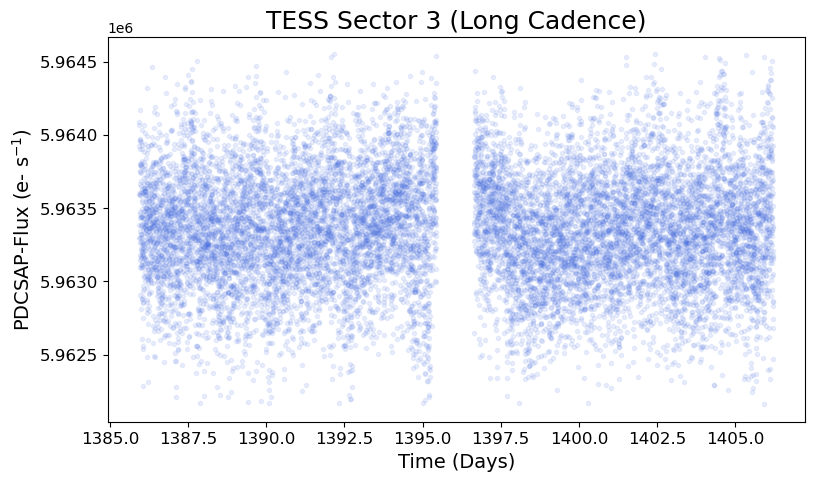

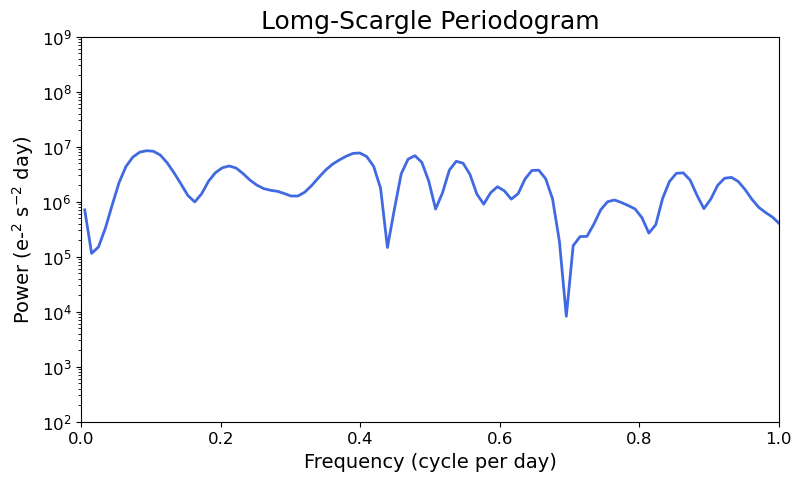

(331.9334150576531, 0.09370380931721878, 4.045193448224335, 10.671924730558873)

In [90]:
plot_MAST_file(MAST1, 3, 'Long Cadence')
plot_lomb_scargle(MAST1)
calculate_frequency(MAST1)

### MAST2 (Sector 4, Long Cadence)

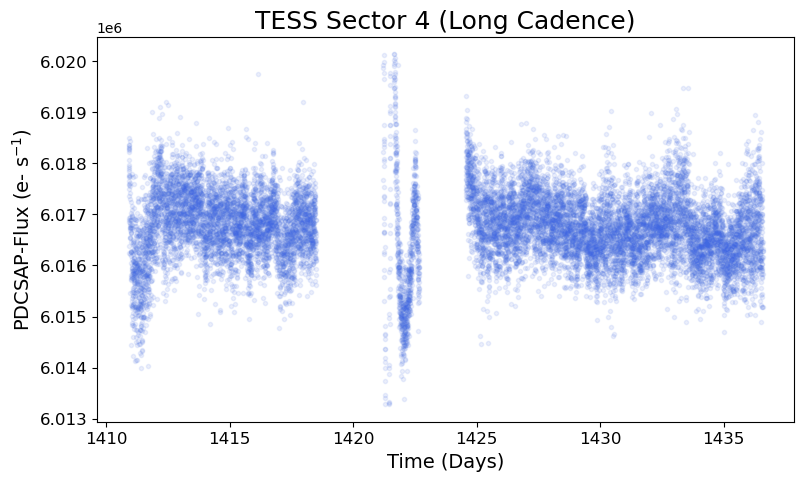

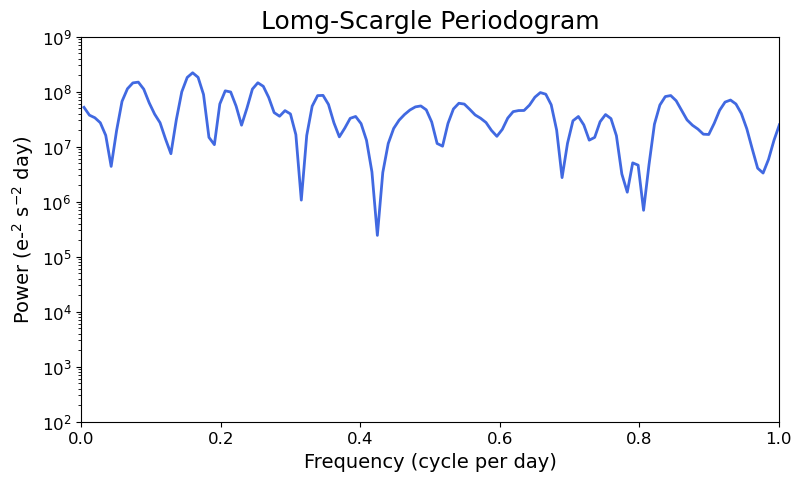

(0.15967296835448225, 6.893082043862999, 6.262800837897297)

In [61]:
plot_MAST_file(MAST2, 4, 'Long Cadence')
plot_lomb_scargle(MAST2)
calculate_frequency(MAST2)

### MAST3 (Sector 30, Short Cadence)

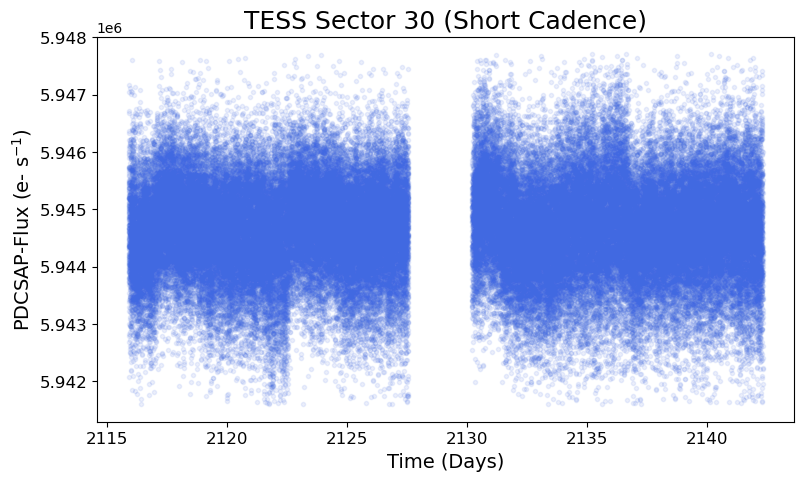

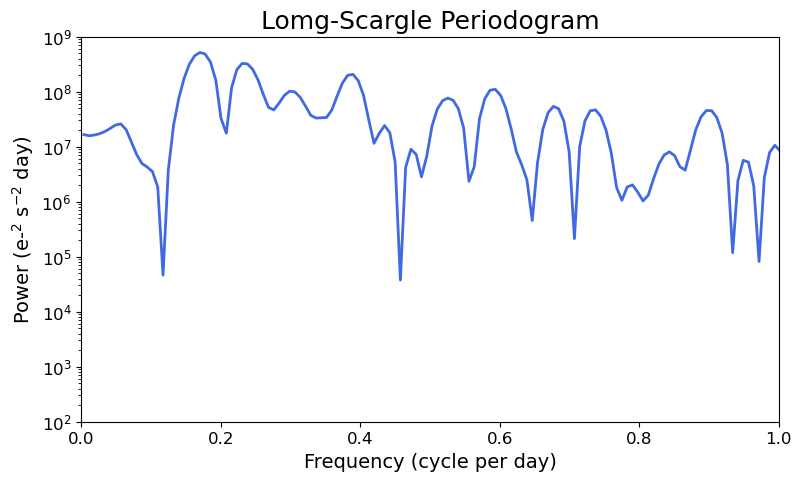

(0.17014239161119518, 7.345047045855296, 5.877430019234555)

In [62]:
plot_MAST_file(MAST3, 30, 'Short Cadence')
plot_lomb_scargle(MAST3)
calculate_frequency(MAST3)

### MAST4 (Sector 30, Long Cadence)

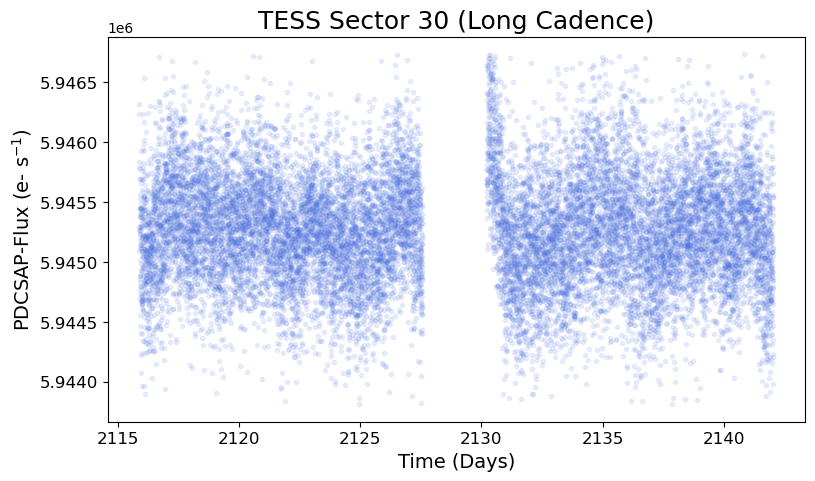

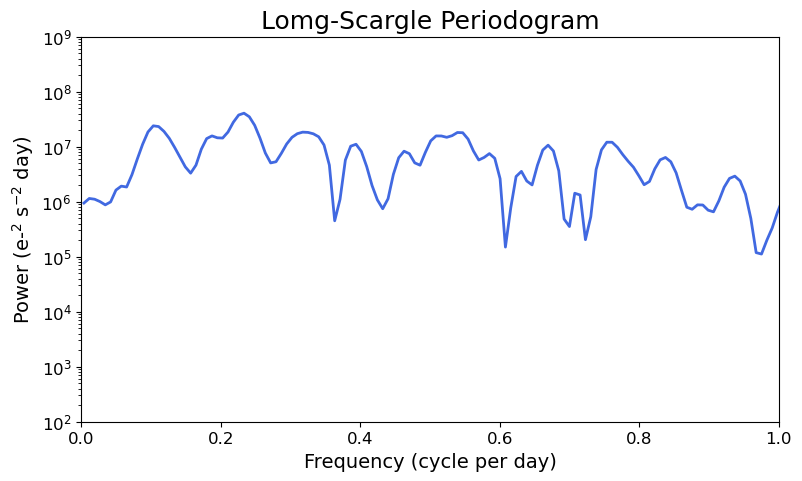

(0.23329181371091556, 10.071207597900225, 4.286477026747084)

In [63]:
plot_MAST_file(MAST4, 30, 'Long Cadence')
plot_lomb_scargle(MAST4)
calculate_frequency(MAST4)

### MAST5 (Sector 31, Short Cadence)

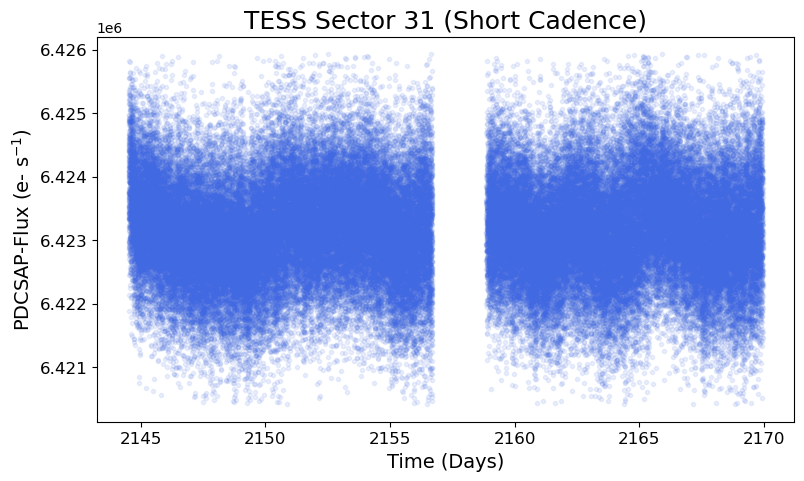

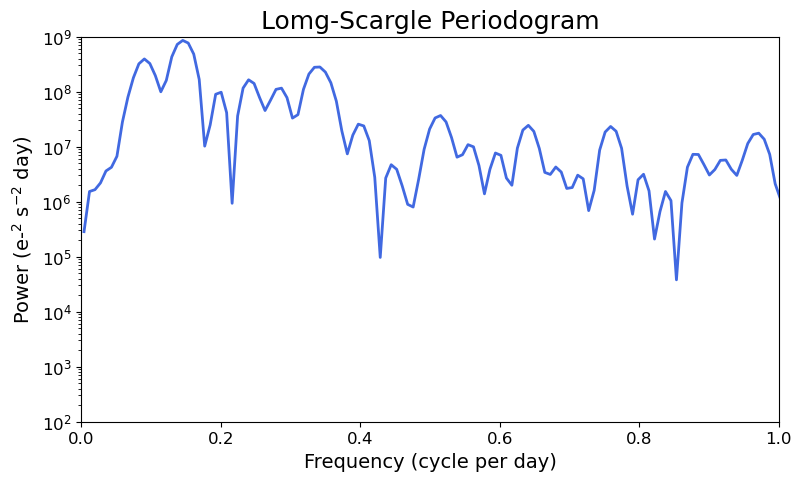

(0.14549368306114793, 6.280962297749757, 6.873150634173726)

In [64]:
plot_MAST_file(MAST5, 31, 'Short Cadence')
plot_lomb_scargle(MAST5)
calculate_frequency(MAST5)

### MAST6 (Sector 31, Long Cadence)

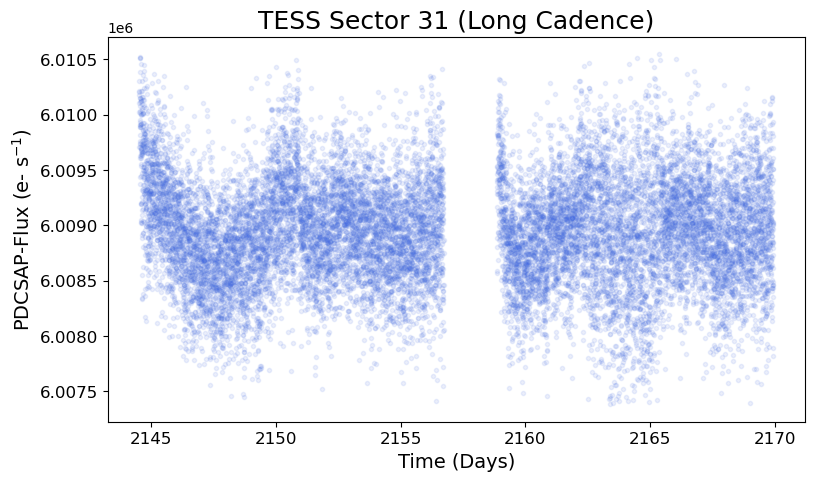

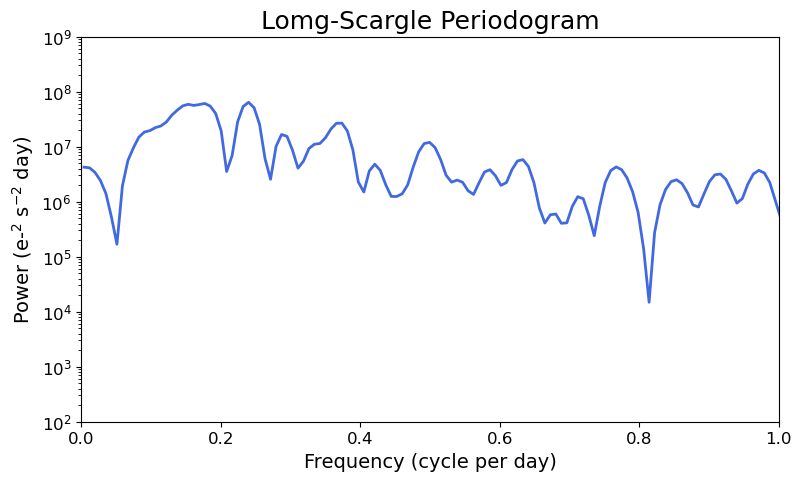

(0.23989853500523858, 10.35641975617615, 4.168428956759421)

In [65]:
plot_MAST_file(MAST6, 31, 'Long Cadence')
plot_lomb_scargle(MAST6)
calculate_frequency(MAST6)

### Average Lomb-Scargle Periodogram

This is the average Lomb-Scargle Periodogram that encompasses the six sectors that were used above. This compiles all the MAST files into a matrix called periodogram_array to then be plotted, along with resolution lines up to the fifth relevant peak.

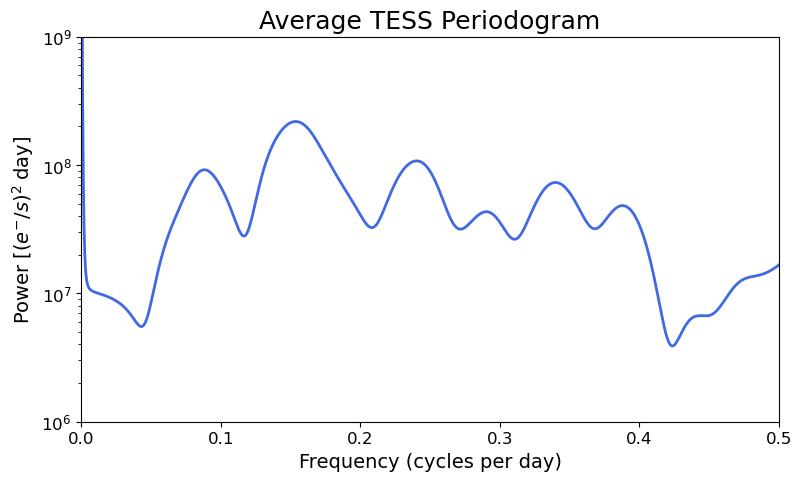

In [69]:
periodogram_array = generate_periodogram_matrix(mast_files)
plot_average_periodogram(periodogram_array, mast_files)

## Combining Time Series Data

Here we add the relevant data to create one longer list of data to create a time series from. We make these longer time series by putting together the data in adjacent sequences, so the sequences being combined would be:
 - Sequences 3 and 4, long cadence
 - Sequences 30 and 31, long cadence
 - Sequences 30 and 31, short cadence

## Functions

The functions below are used in the process of combining the TESS sectors data into a single data file to then be used in plotting periodograms and an average periodogram. We also calculate relevant frequencies and values for each combined section. We also have to pass and process both of the MAST files that are to be combined through each of these new functions.

### Plotting Combined MAST Files

Here we create scatter plots from the combined MAST files. With these scatter plots, we can see the potential presence of a signal within a long time frame.

In [24]:
def plot_combined_MAST_file(mast_file_path1, sector_num1, mast_file_path2, sector_num2, cadence):
    time1, pdcsap_flux1 = process_MAST_file(mast_file_path1)
    time2, pdcsap_flux2 = process_MAST_file(mast_file_path2)
    combined_time = np.concatenate((time1, time2))
    combined_flux = np.concatenate((pdcsap_flux1 - np.mean(pdcsap_flux1), pdcsap_flux2 - np.mean(pdcsap_flux2)))
    plt.figure(figsize=figsize)
    plt.scatter(combined_time, combined_flux, alpha=0.1, color='royalblue', marker='.')
    plt.title(f'TESS Sector {sector_num1} + {sector_num2} ({cadence})', fontsize=title_font)
    plt.xlabel('Time (Days)', fontsize=label_font)
    plt.ylabel(r"PDCSAP-Flux (e- s$^{-1}$)", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.show()

### Combined Harmonics

We create harmonics of any signal that is passed into the function, which would come from the combined TESS sectors, to apply to the Lomb-Scargle periodogram. This function is then repurposed into a harmonics array for the combined TESS sectors. We then apply this array to the combined avearged TESS periodogram later on. We also shade a resolution margin on both sides of the harmonics.

In [51]:
def combined_harmonics(num, mast_file_path1, mast_file_path2):
    time1, pdcsap_flux1 = process_MAST_file(mast_file_path1)
    time2, pdcsap_flux2 = process_MAST_file(mast_file_path2)
    combined_time = np.concatenate((time1, time2))
    time_baseline = combined_time[-1] - combined_time[0]
    resolution = 1 / time_baseline

### Combined Harmonics Array

This is the array that we repurposed the previous function for. This will be applyed solely to the combined average TESS periodogram plot. This function is needed to capture multiple frequencies and serve as a complete representation of the signal's behavior for use in the averaged periodogram. Rather then passing the harmonics function into combined_harmonics_array, this function is limited to a range that captures only the first five resolution lines. These are the peaks within the average periodogram that are used in the time series analysis.

In [39]:
def harmonics_array(num, mast_file_paths):
    for mast_file_path in mast_file_paths:
        time, pdcsap_flux = process_MAST_file(mast_file_path)
        time_baseline = time[-1] - time[0]
        resolution = 1 / time_baseline

### Calculate and Plot Combined Lomb-Scargle

This function is used to calculate and plot Lomb-Scargle periodograms as semi-log on y-axis from the combined TESS data. These Lomb-Scargle periodograms are used for characterizing periodic signals in unevenly spaced or irregularly timed data. We also used the combined_harmonics function here to view harmonics of the input signal. The nyquist factor is the multiple of the average nyquist frequency used to choose the maximum frequency. The nyquist factor is set to one because we have a function to find our maximum frequency, as well as other information.

In [83]:
def plot_combined_lomb_scargle(mast_file_path1, mast_file_path2, y1, y2):
    time1, pdcsap_flux1 = process_MAST_file(mast_file_path1)
    time2, pdcsap_flux2 = process_MAST_file(mast_file_path2)
    combined_time = np.concatenate((time1, time2))
    combined_flux = np.concatenate((pdcsap_flux1, pdcsap_flux2))
    frequency, power = LombScargle(combined_time, combined_flux, normalization="psd").autopower(nyquist_factor=1)
    plt.figure(figsize=figsize)
    plt.semilogy(frequency, power, linewidth=2, color='royalblue')
    plt.title('Lomg-Scargle Periodogram', fontsize=title_font)
    plt.xlabel('Frequency (cycle per day)', fontsize=label_font)
    plt.ylabel(r"Power (e-$^{2}$ s$^{-2}$ day)", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.xlim(0, 0.5)
    plt.ylim(y1, y2)
    combined_harmonics(rp, mast_file_path1, mast_file_path2)
    freq_vlines()

### Calculating Combined Frequency

Unlike the harmonics function, we use this function to get the maximum frequnecy, maxmimum power frequency, fundamental harmonics, and the maximum period of the combined MAST files. These are printed out in the 'Plots' section for each combined TESS sector plots.

In [95]:
def calculate_combined_frequency(mast_file_path1, mast_file_path2):
    time1, pdcsap_flux1 = process_MAST_file(mast_file_path1)
    time2, pdcsap_flux2 = process_MAST_file(mast_file_path2)
    combined_time = np.concatenate((time1, time2))
    combined_flux = np.concatenate((pdcsap_flux1, pdcsap_flux2))
    frequency, power = LombScargle(combined_time, combined_flux, normalization="psd").autopower(nyquist_factor=1)
    max_index = np.argmax(power)
    max_power_frequency = frequency[max_index]
    max_period = 1 / max_power_frequency
    harmonic_plus_one = rp / max_period
    max_frequency = np.max(frequency)
    return max_frequency, max_power_frequency, harmonic_plus_one, max_period

### Combined Periodogram Array

Similar to the combined_harmonics_array function, this is solely used for setting all of the combined MAST periodograms into a single array to then be converted into a two-dimensional matrix in an effort to create an average TESS periodogram from the all combined TESS sector data.

In [100]:
# Old version
def old_generate_combined_periodogram_array(max_freq, mast_file_path1, mast_file_path2, mast_file_path3, mast_file_path4, mast_file_path5, mast_file_path6):
    time1, pdcsap_flux1 = process_MAST_file(mast_file_path1)
    time2, pdcsap_flux2 = process_MAST_file(mast_file_path2)
    time3, pdcsap_flux3 = process_MAST_file(mast_file_path3)
    time4, pdcsap_flux4 = process_MAST_file(mast_file_path4)
    time5, pdcsap_flux5 = process_MAST_file(mast_file_path5)
    time6, pdcsap_flux6 = process_MAST_file(mast_file_path6)
    combined_time1 = np.concatenate((time1, time2))
    combined_flux1 = np.concatenate((pdcsap_flux1, pdcsap_flux2))
    combined_time2 = np.concatenate((time4, time6))
    combined_flux2 = np.concatenate((pdcsap_flux4, pdcsap_flux6))
    combined_time3 = np.concatenate((time3, time5))
    combined_flux3 = np.concatenate((pdcsap_flux3, pdcsap_flux5))
    combined_time_array = np.concatenate((combined_time1, combined_time2, combined_time3))
    combined_flux_array = np.concatenate((combined_flux1, combined_flux2, combined_flux3))
    f_grid = np.linspace(0, max_freq, num=1024)
    periodogram = LombScargle(combined_time_array, combined_flux, normalization="psd").power(f_grid)
    return periodogram

In [ ]:
# Combined time and flux function
def combined_time_and_flux()

In [101]:
def generate_combined_periodogram_array(max_freq, mast_file_path1, mast_file_path2):
    time1, pdcsap_flux1 = process_MAST_file(mast_file_path1)
    time2, pdcsap_flux2 = process_MAST_file(mast_file_path2)
    combined_time1 = np.concatenate((time1, time2))
    combined_flux1 = np.concatenate((pdcsap_flux1, pdcsap_flux2))
    combined_time_array = np.concatenate((combined_time1, combined_time2, combined_time3))
    combined_flux_array = np.concatenate((combined_flux1, combined_flux2, combined_flux3))
    f_grid = np.linspace(0, max_freq, num=1024)
    periodogram = LombScargle(combined_time1, combined_flux1, normalization="psd").power(f_grid)
    return periodogram

### Combined Periodogram Matrix

This is simply to convert the combined periodogram array into a two-dimensional matrix to then be used in the plotting function for the combined average periodogram.

In [30]:
def generate_combined_periodogram_matrix(mast_files):
    periodogram_matrix = []
    
    for i in range(3):
        periodogram = generate_combined_periodogram_array(mast_file_path)
        periodogram_matrix.append(periodogram)
    return np.column_stack(periodogram_matrix)

### Combined Average Periodogram

This function is used to plot the combined average TESS periodogram at the end of the 'Plots' section. We use all the data from the previous combined MAST files to create an average periodogram.

In [102]:
def plot_combined_average_periodogram(periodogram_array, mast_files):
    f_grid = np.linspace(0, 0.5, num=1024) #Change 0.5 to max_freq
    average_periodogram = np.mean(periodogram_array, axis=1)
    plt.figure(figsize=figsize)
    plt.semilogy(f_grid, average_periodogram, color='royalblue', linewidth=2)
    plt.title("Combined Average TESS Periodogram", fontsize=title_font)
    plt.xlabel('Frequency (cycles per day)', fontsize=label_font)
    plt.ylabel(r"Power $[(e^{-}/s)^2 \; \operatorname{day}]$", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.xlim(0, 0.5)
    plt.ylim(1e6, 1e9)
    combined_harmonics_array(rp, mast_files)
    plt.show()

In [14]:
def generate_periodogram_array(mast_file_path):
    time, pdcsap_flux = process_MAST_file(mast_file_path)
    f_grid = np.linspace(0, 0.5, num=1024)
    periodogram = LombScargle(time, pdcsap_flux, normalization="psd").power(f_grid)
    return periodogram

In [15]:
def generate_periodogram_matrix(mast_files):
    periodogram_matrix = []
    for mast_file_path in mast_files:
        periodogram = generate_periodogram_array(mast_file_path)
        periodogram_matrix.append(periodogram)
    return np.column_stack(periodogram_matrix)

In [59]:
def plot_average_periodogram(periodogram_array, mast_files):
    f_grid = np.linspace(0, 0.5, num=1024) # Change 0.5 to max_freq
    average_periodogram = np.mean(periodogram_array, axis=1)
    plt.figure(figsize=figsize)
    plt.semilogy(f_grid, average_periodogram, color='royalblue', linewidth=2)
    plt.title("Average TESS Periodogram", fontsize=title_font)
    plt.xlabel('Frequency (cycles per day)', fontsize=label_font)
    plt.ylabel(r"Power $[(e^{-}/s)^2 \; \operatorname{day}]$", fontsize=label_font)
    plt.tick_params(axis='both', which='major', labelsize=text_font)
    plt.xlim(0, 0.5)
    plt.ylim(1e6, 1e9)
    harmonics_array(rp, mast_files)
    plt.show()

## Plots

Here we use all of the above functions to create plots to characterize signals within the combined TESS data. The first three are of the different combined sectors with their Lomb-Scargle plots and relevant information, and then there is the average TESS periodogram of the combined data.

### MAST1+2 (Sector 3+4, Long Cadence)

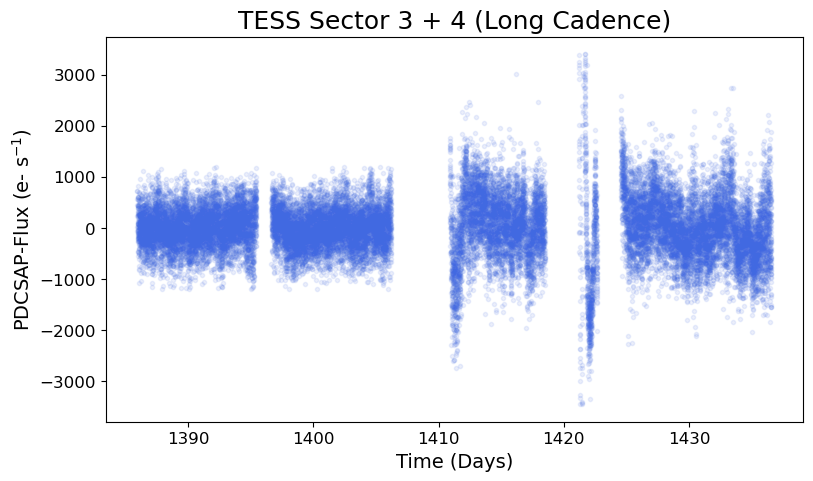

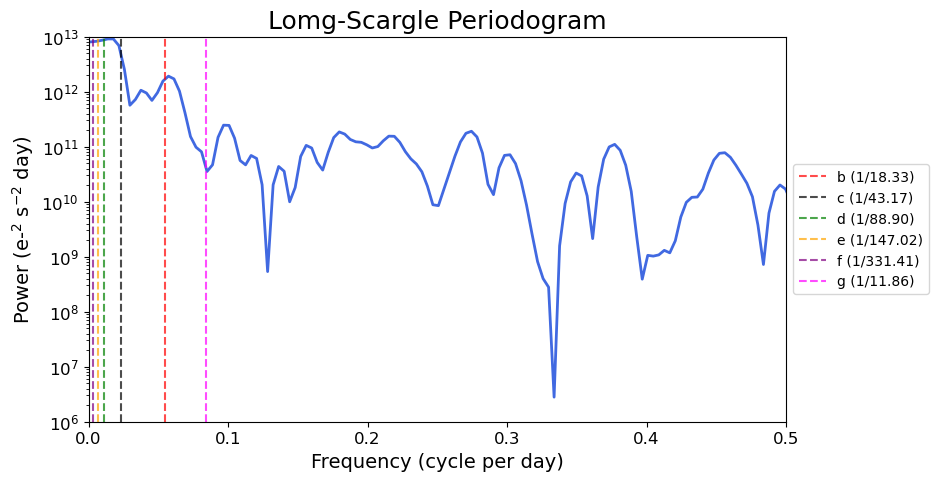

(0.013822235973056603, 0.5967059269568535, 72.3471949074867)

In [86]:
plot_combined_MAST_file(MAST1, 3, MAST2, 4, 'Long Cadence')
plot_combined_lomb_scargle(MAST1, MAST2, 1e6, 1e13)
calculate_combined_frequency(MAST1, MAST2)

### MAST4+6 (Sector 30+31, Long Cadence)

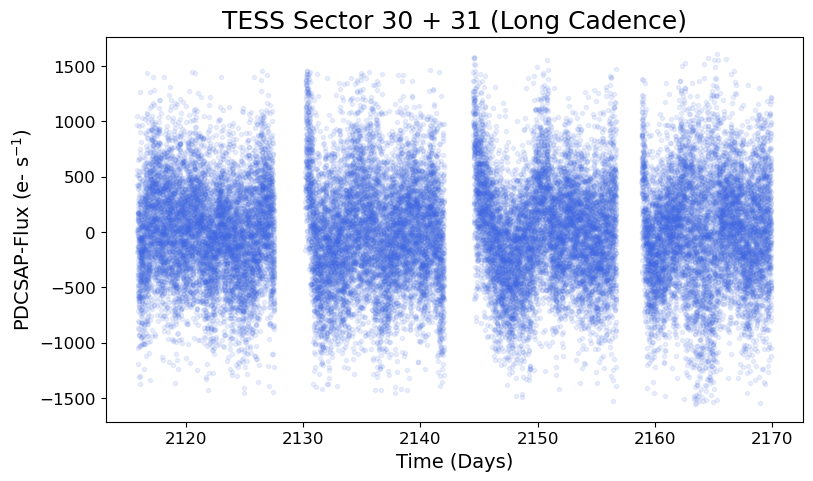

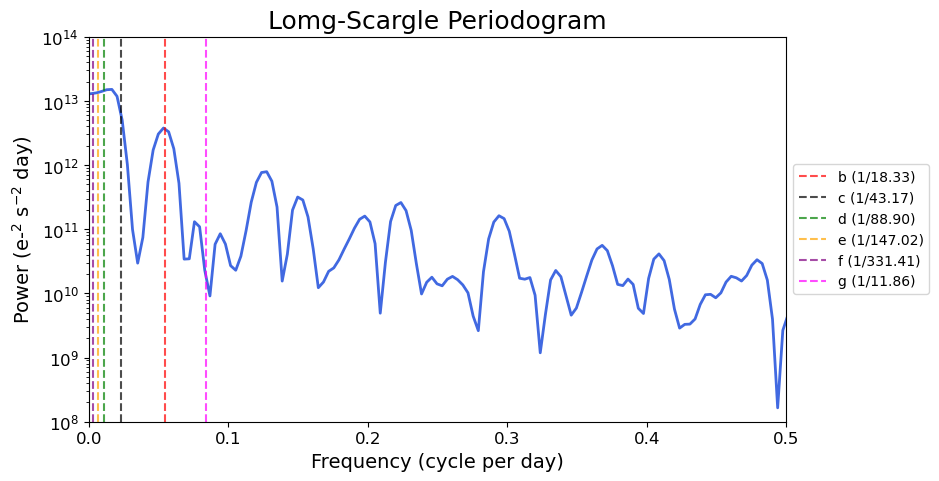

(0.016648704254154427, 0.7187245626518467, 60.064734452260176)

In [84]:
plot_combined_MAST_file(MAST4, 30, MAST6, 31, 'Long Cadence')
plot_combined_lomb_scargle(MAST4, MAST6, 1e8, 1e14)
calculate_combined_frequency(MAST4, MAST6)

### MAST3+5 (Sector 30+31, Short Cadence)

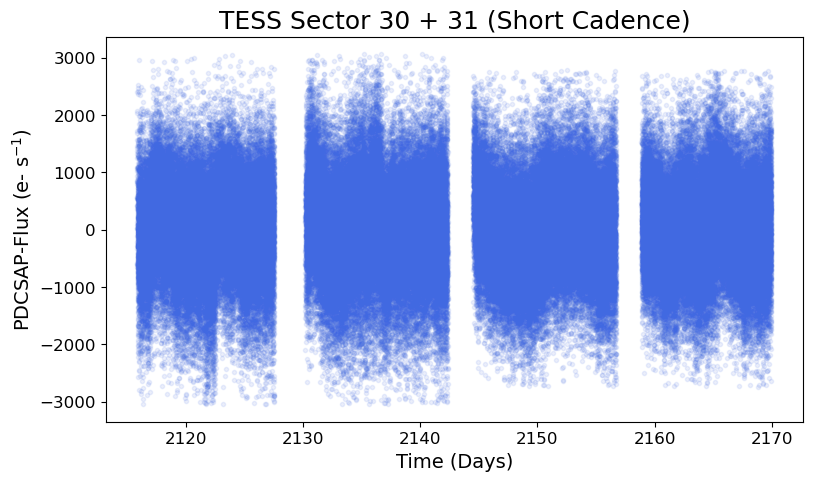

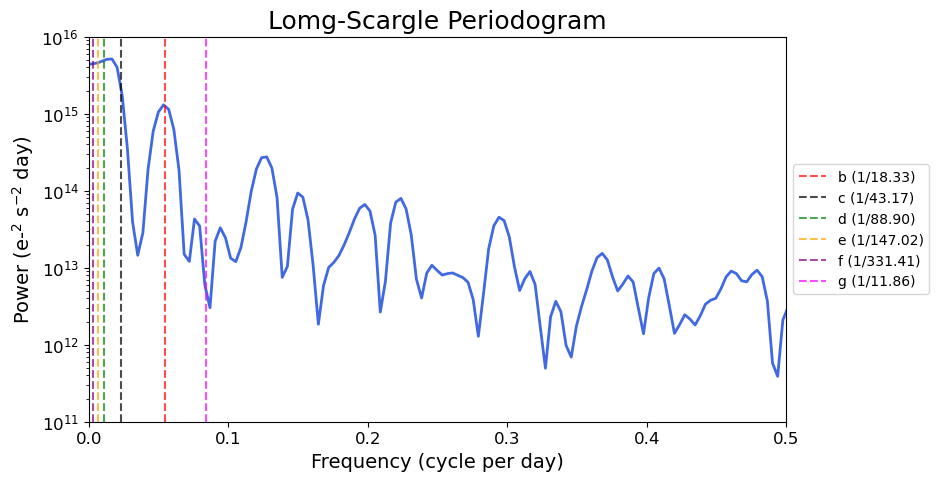

(0.01664813395164726, 0.7186999426926123, 60.06679204434527)

In [85]:
plot_combined_MAST_file(MAST3, 30, MAST5, 31, 'Short Cadence')
plot_combined_lomb_scargle(MAST3, MAST5, 1e11, 1e16)
calculate_combined_frequency(MAST3, MAST5)

### Average Lomb-Scargle Periodogram

This is the combined average Lomb-Scargle Periodogram that encompasses the three combined sectors that were used above. This compiles all the combined MAST files into a matrix called combined_periodogram_array to then be plotted.

In [96]:
# Choose minimum frequency to pass to generate_combined_periodogram_array
max_freq1 = calculate_combined_frequency(MAST1, MAST2)
max_freq2 = calculate_combined_frequency(MAST4, MAST6)
max_freq3 = calculate_combined_frequency(MAST3, MAST5)
print(max_freq1)
print(max_freq2)
print(max_freq3)

(277.9158002896931, 0.013822235973056603, 0.5967059269568535, 72.3471949074867)
(308.6503281677689, 0.016648704254154427, 0.7187245626518467, 60.064734452260176)
(1870.1570287023271, 0.01664813395164726, 0.7186999426926123, 60.06679204434527)


In [99]:
combined_periodogram_array = generate_combined_periodogram_matrix()
plot_combined_average_periodogram(combined_periodogram_array, )

/Users/andrewandmatthewfonseca/anaconda3/lib/python3.10/site-packages/astropy/timeseries/periodograms/lombscargle/implementations/fast_impl.py:102: RuntimeWarning: invalid value encountered in divide
  tan_2omega_tau = (S2 - 2 * S * C) / (C2 - (C * C - S * S))


In [ ]:
# Non-combined avearge plot
periodogram_array = generate_periodogram_matrix(mast_files)
plot_average_periodogram(periodogram_array, mast_files)